In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import glob
import re


In [98]:
# beige_color = (255/255,253/255,250/255)
beige_color = '#FFFDFA'

# sns.set_theme(style="ticks", rc={'figure.facecolor': beige_color, 'axes.facecolor' : beige_color})
sns.set_theme(style="ticks")
# sns.set_context("talk")
# sns.set_context("poster")


In [102]:
path = "results/linear_multi"
all_file = glob.glob(path + "/*.csv")
print(all_file)

['results/linear_multi\\linear_dgp_svi_diff_1.csv', 'results/linear_multi\\linear_dgp_svi_diff_10.csv', 'results/linear_multi\\linear_dgp_svi_diff_11.csv', 'results/linear_multi\\linear_dgp_svi_diff_12.csv', 'results/linear_multi\\linear_dgp_svi_diff_13.csv', 'results/linear_multi\\linear_dgp_svi_diff_14.csv', 'results/linear_multi\\linear_dgp_svi_diff_15.csv', 'results/linear_multi\\linear_dgp_svi_diff_16.csv', 'results/linear_multi\\linear_dgp_svi_diff_17.csv', 'results/linear_multi\\linear_dgp_svi_diff_18.csv', 'results/linear_multi\\linear_dgp_svi_diff_19.csv', 'results/linear_multi\\linear_dgp_svi_diff_2.csv', 'results/linear_multi\\linear_dgp_svi_diff_20.csv', 'results/linear_multi\\linear_dgp_svi_diff_21.csv', 'results/linear_multi\\linear_dgp_svi_diff_22.csv', 'results/linear_multi\\linear_dgp_svi_diff_23.csv', 'results/linear_multi\\linear_dgp_svi_diff_24.csv', 'results/linear_multi\\linear_dgp_svi_diff_25.csv', 'results/linear_multi\\linear_dgp_svi_diff_26.csv', 'results/line

In [128]:
lin_dfs = [pd.read_csv(f) for f in all_file]
combined_df = pd.concat(lin_dfs)
combined_df[['model', 'type']] = combined_df['method'].str.split('_', expand=True)
print(combined_df.head(5))


   idx   mean  median   true   bias    std   RMSE  RMSE_all    MAE  MAE_all  \
0  1.0  0.847   0.847  0.839  0.008  0.026  0.027     0.071  0.022    0.043   
1  1.0  0.822   0.821  0.839 -0.017  0.031  0.036     0.186  0.029    0.091   
2  1.0  2.712   2.712  2.690  0.022  0.082  0.085     0.105  0.068    0.076   
3  1.0  2.589   2.588  2.690 -0.101  0.095  0.138     0.397  0.115    0.173   
4  1.0  0.614   0.613  0.839 -0.225  0.048  0.231     0.422  0.226    0.315   

   ...  rel_RMSE_all   q025   q975  covering  mean_ind_cover           method  \
0  ...  5.000000e-03  0.796  0.898       1.0           1.000    Linear_oracle   
1  ...  2.900000e-02  0.761  0.881       1.0           1.000        GP_oracle   
2  ...  1.000000e-03  2.551  2.872       1.0           1.000    Linear_oracle   
3  ...  8.000000e-03  2.405  2.773       1.0           0.998        GP_oracle   
4  ...  4.616682e+07  0.518  0.710       0.0           0.224  Linear_observed   

   estimand  TRUE   model      type  


In [129]:
combined_df.columns

Index(['idx', 'mean', 'median', 'true', 'bias', 'std', 'RMSE', 'RMSE_all',
       'MAE', 'MAE_all', 'MAPE', 'MAPE_all', 'rel_RMSE', 'rel_RMSE_all',
       'q025', 'q975', 'covering', 'mean_ind_cover', 'method', 'estimand',
       'TRUE', 'model', 'type'],
      dtype='object')

In [130]:
combined_df[['bias','median','true','mean','std','RMSE','RMSE_all','MAE', 'MAE_all', 'MAPE', 'MAPE_all', 'rel_RMSE', 'rel_RMSE_all',
             'q025','q975','covering','mean_ind_cover']] = combined_df[['bias','median','true','mean','std','RMSE','RMSE_all','MAE', 'MAE_all', 'MAPE', 'MAPE_all', 'rel_RMSE', 'rel_RMSE_all',
                                                                        'q025','q975','covering', 'mean_ind_cover']].apply(pd.to_numeric, errors='coerce')

# combined_df[['bias','median','true','mean','std','RMSE','RMSE_all','MAE', 'MAE_all', 'q025','q975','covering','mean_ind_cover']] = combined_df[['bias','median','true','mean','std','RMSE','RMSE_all','MAE', 'MAE_all', 
#                                                                         'q025','q975','covering', 'mean_ind_cover']].apply(pd.to_numeric, errors='coerce')

In [131]:
# combined_df = combined_df.apply(pd.to_numeric, errors='coerce')


combined_df['type'] = combined_df['type'].replace('observed',"Obs.")
combined_df['type'] = combined_df['type'].replace('oracle',"Oracle")
combined_df['type'] = combined_df['type'].replace('plugin',"Plugin")
combined_df['abs_bias'] = np.abs(combined_df['bias'])
combined_df['ci_length'] = combined_df['q975'] - combined_df['q025']
# combined_df['MAPE_manual'] = np.abs((combined_df['mean']-combined_df['true'])/combined_df['true'])
# combined_df['rel_RMSE'] = np.square((combined_df['mean']-combined_df['true'])/combined_df['true'])

# combined_df.to_csv("results/linear_dgp_N300.csv")


In [132]:
# print dtype of each column 
print(combined_df.dtypes)

idx               float64
mean              float64
median            float64
true              float64
bias              float64
std               float64
RMSE              float64
RMSE_all          float64
MAE               float64
MAE_all           float64
MAPE              float64
MAPE_all          float64
rel_RMSE          float64
rel_RMSE_all      float64
q025              float64
q975              float64
covering          float64
mean_ind_cover    float64
method             object
estimand           object
TRUE              float64
model              object
type               object
abs_bias          float64
ci_length         float64
dtype: object


In [133]:
err_mask = (combined_df['type'].values == '3S') & (combined_df['MAE'].values > .81)
err_idx = combined_df[err_mask]['idx'].unique()
combined_df = combined_df[~combined_df['idx'].isin(err_idx)]
print(combined_df.shape)

(8016, 25)


In [139]:
# Save as csv
combined_df.to_csv("results/linear_results_combined_N500.csv")

In [ ]:
# TODO: clean all the above in final version

In [144]:
combined_df = pd.read_csv("results/linear_results_combined_N500.csv")
combined_df['rel_RMSE'] = np.sqrt(combined_df['rel_RMSE'])
combined_df['rel_RMSE_all'] = np.sqrt(combined_df['rel_RMSE_all'])

In [157]:
def coverage_perc(x):
    return np.mean(x)*100

# df_summary = combined_df.groupby(["estimand", "model", "type"]).agg(
df_summary = combined_df.groupby(["estimand", "model", "type"]).agg(
                                        # {'mean' : ['mean'],
                                         # 'median' : ['mean'],
                                         {'bias' : ['mean', 'std'],
                                         # 'std' : ['mean','std'],
                                         # 'true' : ['mean'],
                                         # 'RMSE' : ['mean','std'],
                                         # 'RMSE_all' : ['mean','std'],
                                         # 'MAE' : ['mean','std'],
                                         # 'MAE_all' : ['mean'],
                                         'MAPE' : ['mean','std'],
                                        # 'MAPE_all' : ['mean'],
                                        #  'rel_RMSE' : ['mean','std'],
                                        # 'rel_RMSE_all' : ['mean'],
                                        #  'q025' : ['mean'],
                                        #  'q975' : ['mean'],
                                         'ci_length' : ['mean','std'],
                                         'covering' : [coverage_perc],
                                         'mean_ind_cover' : ['mean']}, ).reset_index()
                                         # 'true_included99' : [coverage_perc]})
                                         # 'true_included95' : ['mean'],
                                         # 'true_included99' : ['mean']})

df_summary.columns = ['estimand','model','type','bias','bias_std', 'MAPE','MAPE_std', 'ci_length','ci_length_std','covering','mean_ind_cover']
df_summary

,estimand,model,type,bias,bias_std,MAPE,MAPE_std,ci_length,ci_length_std,covering,mean_ind_cover
0,dynamic,GP,1S,0.005818,0.052495,0.072060,0.033396,0.160619,0.037883,88.423154,0.455665
1,dynamic,GP,3S,-0.162852,0.050143,0.218709,0.050241,0.173577,0.032831,3.992016,0.906503
2,dynamic,GP,Obs.,-0.331138,0.099503,0.444914,0.102071,0.267601,0.043613,1.596806,0.452236
3,dynamic,GP,Oracle,-0.019351,0.023014,0.040878,0.017966,0.092162,0.019792,88.423154,0.952687
4,dynamic,Linear,1S,0.028691,0.045414,0.066377,0.039208,0.121353,0.024437,74.051896,0.200164
5,dynamic,Linear,3S,-0.139549,0.046861,0.187246,0.048675,0.146186,0.024388,5.788423,0.795321
6,dynamic,Linear,Obs.,-0.202096,0.076237,0.270535,0.082267,0.164844,0.028458,5.588822,0.231202
7,dynamic,Linear,Oracle,0.000373,0.019636,0.030483,0.010386,0.080920,0.015305,97.005988,0.968419
8,stoch,GP,1S,0.022154,0.156372,0.065194,0.025965,0.578429,0.068555,93.612774,0.580248
9,stoch,GP,3S,-0.628437,0.088440,0.238042,0.033002,0.503862,0.032156,0.199601,0.768108


In [152]:
def generate_latex_table(df):
    # Round all numeric columns to 3 decimal places
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df[numeric_columns] = df[numeric_columns].round(3)

    # Start the LaTeX table
    latex_table = "\\begin{table}[htbp]\n\\centering\n\\caption{Simulation Results}\n\\label{tab:simulation_results}\n"
    latex_table += "\\begin{tabular}{lllcccc}\n\\toprule\n"
    latex_table += "Estimand & Model & Type & Bias (std) & MAPE (std) & CI Length (std) & Coverage \\\\\n\\midrule\n"

    # Group by estimand and model
    for e, (estimand, estimand_group) in enumerate(df.groupby('estimand')):
        for m, (model, model_group) in enumerate(estimand_group.groupby('model')):
            if m > 0:
                latex_table += "\\cmidrule{2-7}\n"

            for i, (_, row) in enumerate(model_group.iterrows()):
                if i == 0:
                    if m == 0:
                        latex_table += f"\\multirow{{8}}{{*}}{{{estimand}}} & "
                    else:
                        latex_table += " & "
                    latex_table += f"\\multirow{{4}}{{*}}{{{model}}} "
                else:
                    latex_table += " & "
                
                bias_str = f"{row['bias']:.3f} ({row['bias_std']:.3f})"
                mape_str = f"{row['MAPE']:.3f} ({row['MAPE_std']:.3f})"
                ci_length_str = f"{row['ci_length']:.3f} ({row['ci_length_std']:.3f})"
                coverage_str = f"{row['covering']:.1f}\\%"
                
                latex_table += f"& {row['type']} & {bias_str} & {mape_str} & {ci_length_str} & {coverage_str} \\\\\n"

        if e == 0:  # Add midrule after first estimand
            latex_table += "\\midrule\n"

    # End the LaTeX table
    latex_table += "\\bottomrule\n\\end{tabular}\n\\end{table}"

    return latex_table


# Assuming your DataFrame is called 'results_df'
latex_table = generate_latex_table(df_summary)
print(latex_table)

\begin{table}[htbp]
\centering
\caption{Simulation Results}
\label{tab:simulation_results}
\begin{tabular}{lllcccc}
\toprule
Estimand & Model & Type & Bias (std) & MAPE (std) & CI Length (std) & Coverage \\
\midrule
\multirow{8}{*}{dynamic} & \multirow{4}{*}{GP} & 1S & 0.006 (0.052) & 0.072 (0.033) & 0.161 (0.038) & 88.4\% \\
 & & 3S & -0.163 (0.050) & 0.219 (0.050) & 0.174 (0.033) & 4.0\% \\
 & & Obs. & -0.331 (0.100) & 0.445 (0.102) & 0.268 (0.044) & 1.6\% \\
 & & Oracle & -0.019 (0.023) & 0.041 (0.018) & 0.092 (0.020) & 88.4\% \\
\cmidrule{2-7}
 & \multirow{4}{*}{Linear} & 1S & 0.029 (0.045) & 0.066 (0.039) & 0.121 (0.024) & 74.1\% \\
 & & 3S & -0.140 (0.047) & 0.187 (0.049) & 0.146 (0.024) & 5.8\% \\
 & & Obs. & -0.202 (0.076) & 0.271 (0.082) & 0.165 (0.028) & 5.6\% \\
 & & Oracle & 0.000 (0.020) & 0.030 (0.010) & 0.081 (0.015) & 97.0\% \\
\midrule
\multirow{8}{*}{stoch} & \multirow{4}{*}{GP} & 1S & 0.022 (0.156) & 0.065 (0.026) & 0.578 (0.069) & 93.6\% \\
 & & 3S & -0.628 (0.088) 

Text(0, 0.5, '')

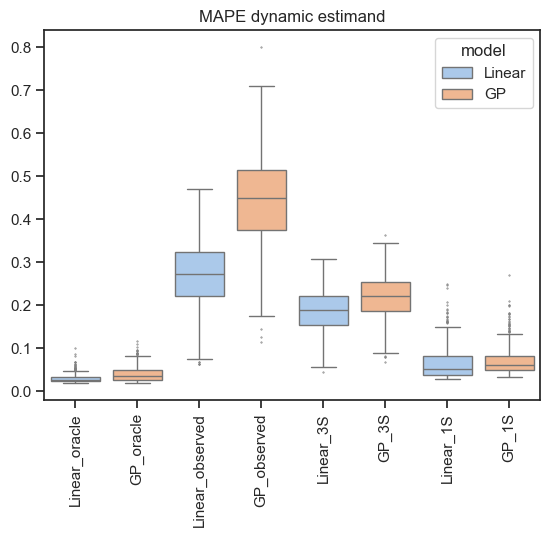

In [153]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=1,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'MAPE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "model", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("MAPE dynamic estimand")
# plt.ylim(0,.5)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")
# sns.despine()

In [95]:
# Zeigen MAE plots

from matplotlib.ticker import PercentFormatter

plt.style.use('seaborn-v0_8-colorblind')
# sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("paper", font_scale=1.3)


zeigen_mae_obs = np.loadtxt('results/zeigen_mae_obs.txt')
esti_zeigen_mae_post = np.loadtxt('results/esti_zeigen_mae_post.txt')
zeigen_mae_post = np.loadtxt('results/zeigen_mae_post.txt')


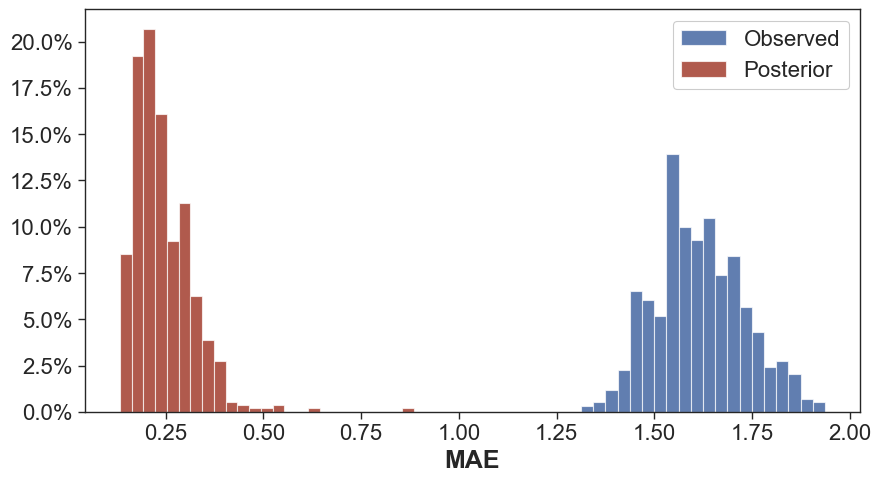

In [96]:

def plot_percentage_histogram(data, bins, ax, label, color, alpha=0.7):
    counts, bin_edges = np.histogram(data, bins=bins, density=True)
    bin_widths = np.diff(bin_edges)
    percentage = counts * bin_widths * 100  # Convert to percentage
    ax.bar(bin_edges[:-1], percentage, width=bin_widths, alpha=alpha, label=label, color=color, align='edge')

fig, ax = plt.subplots(figsize=(9, 5))

# Plot histograms as density

plot_percentage_histogram(zeigen_mae_obs, 20, ax, 'Observed', 'xkcd:cobalt')
plot_percentage_histogram(esti_zeigen_mae_post, 25, ax, 'Posterior', 'xkcd:brick red')


# Set labels and title
ax.set_xlabel('MAE', fontsize=18, fontweight='bold')
ax.set_ylabel('')
ax.set_title('')

# Adjust y-axis to show correct percentage
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x:.1f}%"))

# Increase font size of tick labels
ax.tick_params(axis='both', which='major', labelsize=16)

# Add legend
ax.legend(fontsize=16,
          frameon=True, fancybox=True, framealpha=1)


# Save the figure
plt.tight_layout()
plt.savefig('results/figs/mae_hist.png', dpi=1000)
plt.show()
